To illustrate the difference in the algorithms that we studied, we are going to visualize the way they classify a fractal. You can choose which of the two models do you want to play with by running the cell of that model.

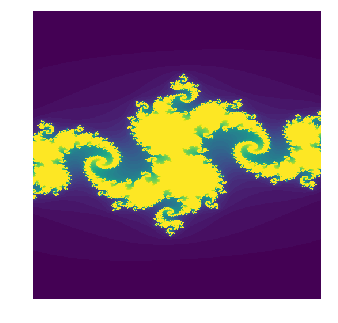

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

h,w, maxit=500,500,50
"""Returns an image of the Mandelbrot fractal of size (h,w)."""
X = np.ones((500,500))
c = (-0.8+0.156*1j)*X
y,x = np.ogrid[ -1.5:1.5:h*1j, -1:1:w*1j ]
z= x+y*1j


Julia = maxit + np.zeros(z.shape, dtype=int)

for i in tqdm_notebook(range(maxit)):
    z = z**2+c 
    diverge = (z)*np.conj(z) > 2**2            # who is diverging
    div_now = diverge & (Julia==maxit)  # who is diverging now
    Julia[div_now] = i                  # note when
    z[diverge] = 2                        # avoid diverging too much


fig = plt.figure()
ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks
plt.imshow(Julia)


plt.show()

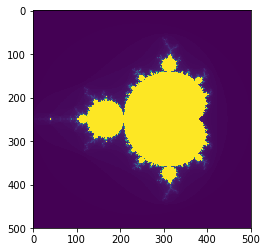

In [9]:

def mandelbrot( h,w, maxit=150 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.5:1.5:h*1j, -2:1:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in tqdm_notebook(range(maxit)):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime
Mandel = mandelbrot(500,500)
plt.imshow(Mandel)
plt.show()

We want to train different machine learning algorithms with 1000 random points from the image of the fractal and then we ask the algorithm to assign a color based on their training.

Here we prepare the data for the algorithms:

In [10]:

points = 1000
equis = np.random.choice(500,points)
uay = np.random.choice(500,points)
BX=[[equis[i], uay[i]] for i in range(points)]
long = [ [x,y] for x in range(500) for y in range(500)]

Below we can select which image we want the algorithms to learn:

In [11]:

selection = Julia# Mandel #Change this to Julia to work with the other fractal

And the following code will show us how the algorithms categorize every pixel in the square [0,500]x[0,500]. It will take time to run.

In [12]:

# Modified for documentation by ED
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
val = selection[equis, uay]
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", 
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(15),
    SVC(kernel="linear"),
    SVC( C=1),
    DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=15, n_estimators=15, max_features=2),
    MLPClassifier(hidden_layer_sizes =(500, 300, 300, ), max_iter =1000, warm_start =True, early_stopping=True),
    GaussianNB()]
def thereYouGo(method, name):#,BX = BX, val=val, long=long,prediction=prediction,classifiers=classifiers):
    method.fit(BX, val) 
    
    prediction = method.predict(long)
    pred= np.array(prediction)
    this=pred.reshape(500,500)
    fig = plt.figure(frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    plt.title(method)
    plt.imshow(this)
    plt.savefig(name+'.png')
from multiprocessing import Pool
import threading
thread = [None]*10
for i in range(7):
    #print(classifiers[i])
    thread[i] = threading.Thread(target = thereYouGo, args = [classifiers[i], names[i]])
    thread[i].start()
    #print(i)

5

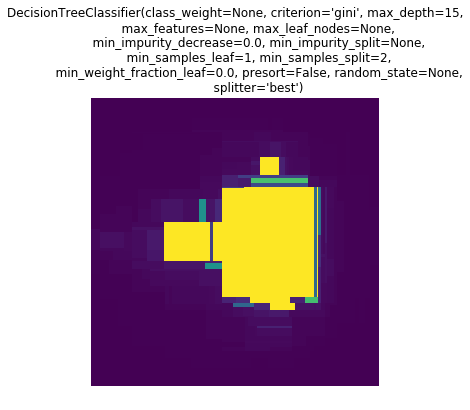

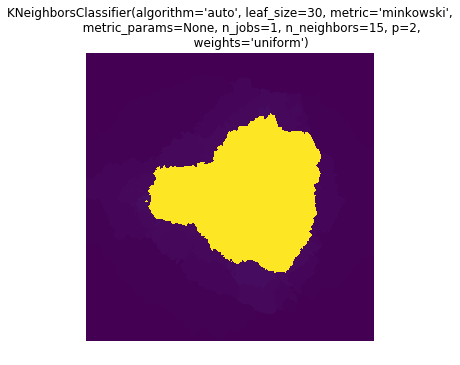

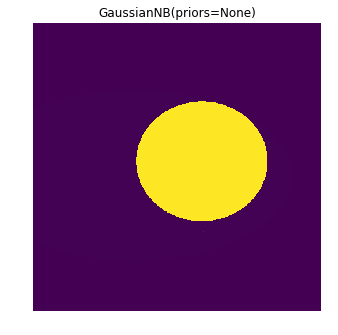

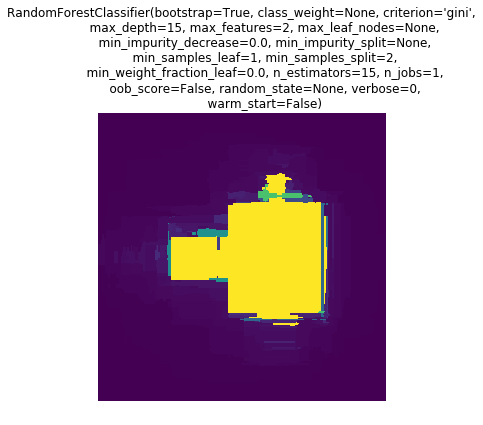

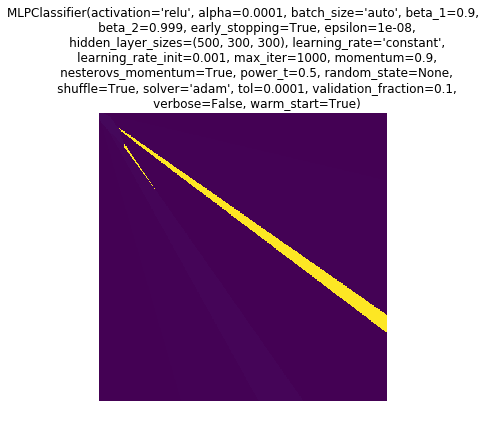

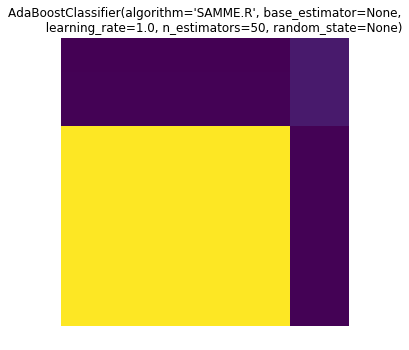

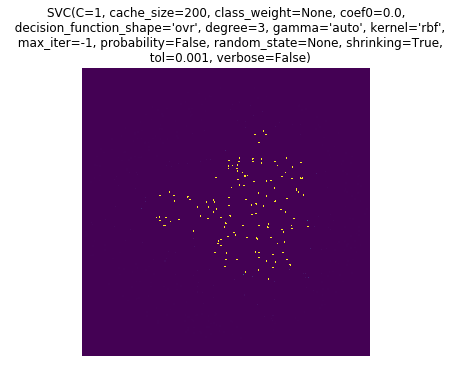

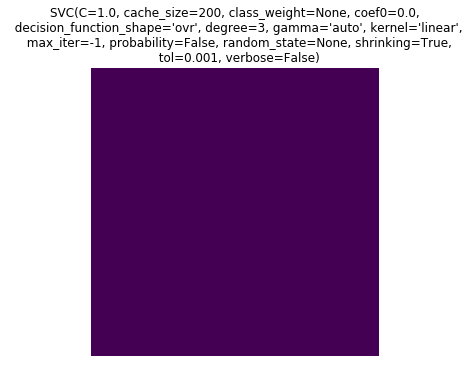

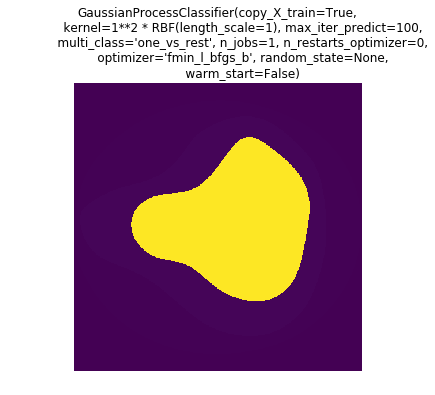

In [59]:
threading.active_count()

In [16]:
threading.active_count()


5

After everytime you run the previous code, it is a good idea to run:

In [36]:
import gc
gc.collect()

17086

In [ ]:
Question, why is the image of the desition tree/random forest made out of rectangles?

In [ ]:
Why is the KNN missing straight lines?

In [ ]:
Look a the methods that you have studied, are the regions classified as expected?